##### IMPORTS

In [1]:
from ptracking.topic.lda_tomoto import *
from ptracking.predict import Dataset
from ptracking.sentiment.corenlp import sentiment, ner
from ptracking.database.database import Fetcher
from ptracking.twitter_scraper.twitter_scraper import TwitterFetcher

import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef, accuracy_score, f1_score, ConfusionMatrixDisplay

from xgboost import XGBClassifier

skf = StratifiedKFold()
tss = TimeSeriesSplit()

Get features

In [15]:
topics, _ = tomoto_topics(25,30, gvmt_period='fourth')
sentiments = sentiment()
named_ent = ner()
same_day = Fetcher().number_of_petitions_on_same_day()
twitter = TwitterFetcher().get_twitter_features()

Topic Model Training...


Iteration: 0	Log-likelihood: -8.299222453641015
Iteration: 1	Log-likelihood: -8.135636768746137
Iteration: 2	Log-likelihood: -8.048434561388241
Iteration: 3	Log-likelihood: -7.98726941815681
Iteration: 4	Log-likelihood: -7.942028062685417
Iteration: 5	Log-likelihood: -7.906888748958871
Iteration: 6	Log-likelihood: -7.879725146149147
Iteration: 7	Log-likelihood: -7.857316126983105
Iteration: 8	Log-likelihood: -7.838760095745315
Iteration: 9	Log-likelihood: -7.825056965957151
Iteration: 10	Log-likelihood: -7.813368348998341
Iteration: 11	Log-likelihood: -7.801556159257291
Iteration: 12	Log-likelihood: -7.791963702670673
Iteration: 13	Log-likelihood: -7.78606729046652
Iteration: 14	Log-likelihood: -7.783151121642993
Iteration: 15	Log-likelihood: -7.773777149820754
Iteration: 16	Log-likelihood: -7.76808229120259
Iteration: 17	Log-likelihood: -7.766999572804021
Iteration: 18	Log-likelihood: -7.762367807551528
Iteration: 19	Log-likelihood: -7.760230737364226
Iterati

#### Baseline

Create Baseline Dataset

In [16]:
dataset = topics.join(Dataset().prepare(columns=["created_at"]))
dataset.sort_values("created_at", inplace=True)
dataset = dataset.reset_index()

X = np.array(dataset.iloc[:,1:-3].values.tolist())
y = np.array(dataset['class'].values.tolist())

##### Classifiers trained with stratified cross validation

KNN

C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


MCC 0.04
Accuracy 0.43
F1 0.38


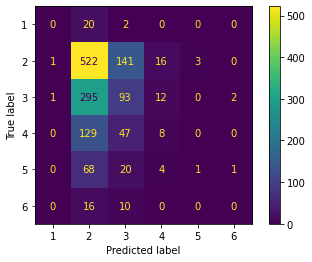

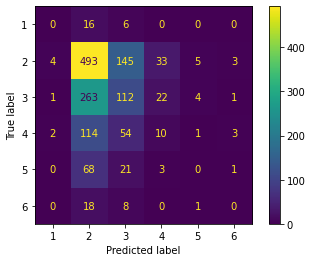

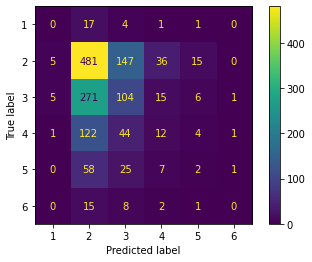

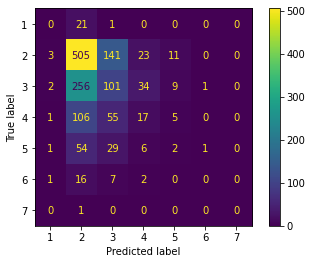

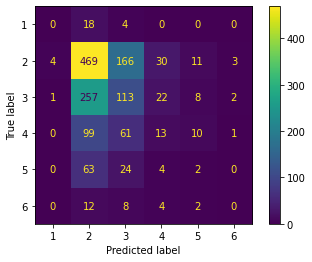

In [12]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


MCC 0.08
Accuracy 0.39
F1 0.39


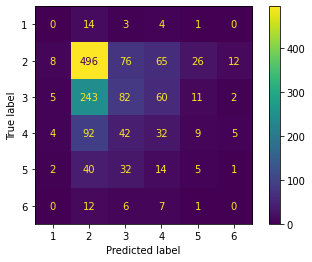

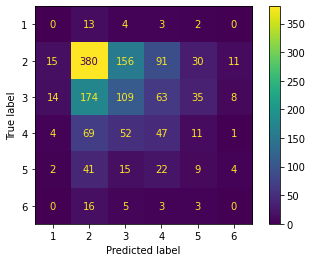

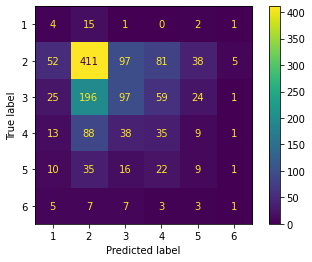

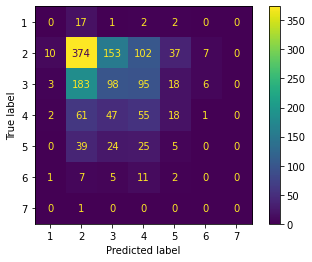

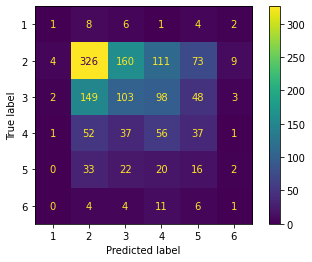

In [13]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:17:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MCC 0.07
Accuracy 0.45
F1 0.39


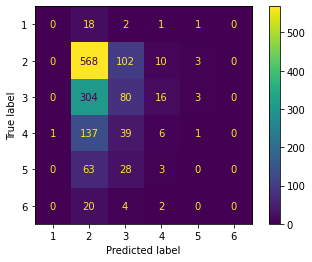

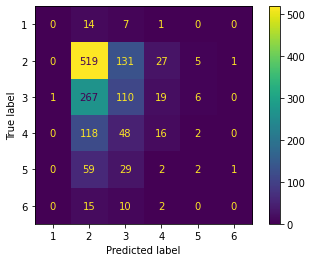

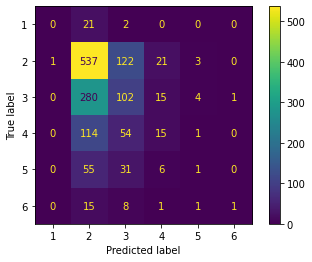

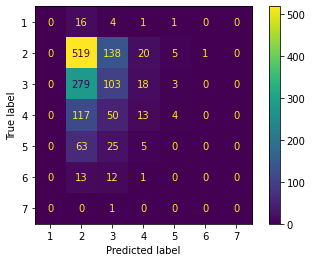

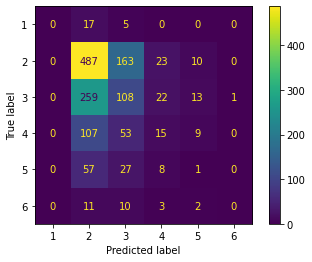

In [17]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

##### Classifiers trained with timesplit cross validation

KNN

MCC 0.02
Accuracy 0.41
F1 0.37


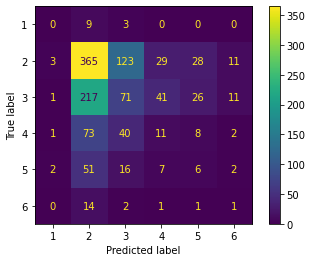

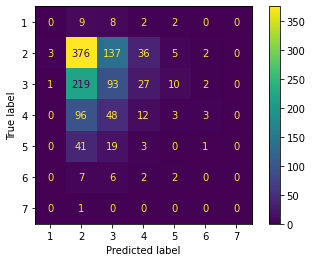

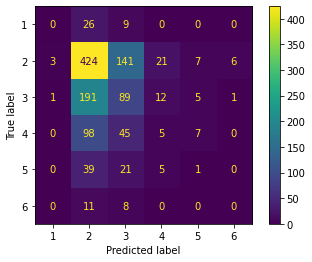

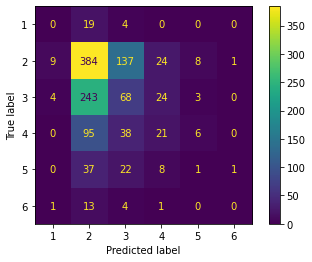

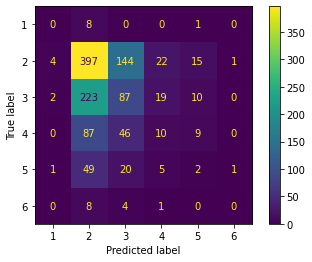

In [4]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [6]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

ValueError: Negative values in data passed to ComplementNB (input X)

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

MCC 0.05
Accuracy 0.44
F1 0.39


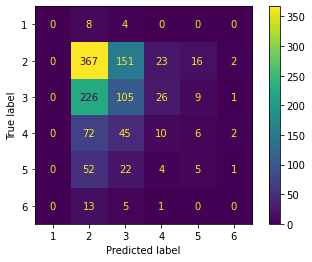

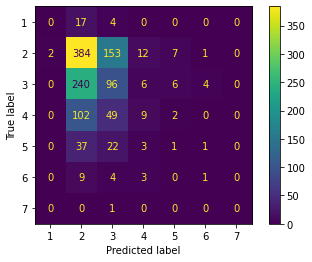

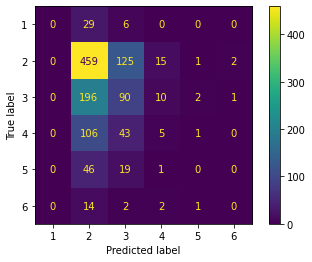

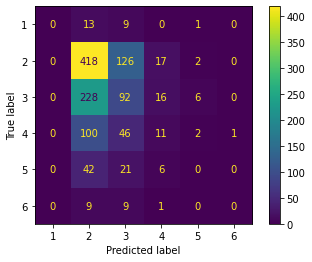

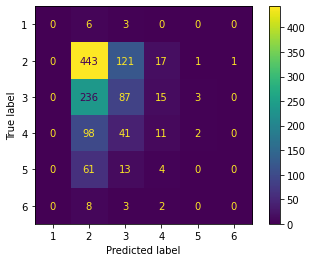

In [7]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mihut\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MCC 0.05
Accuracy 0.43
F1 0.39


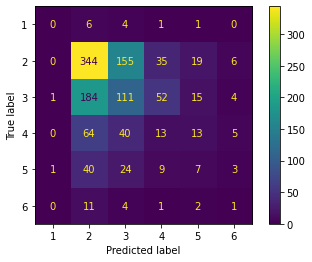

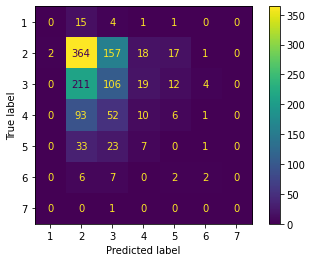

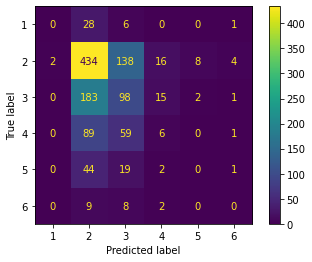

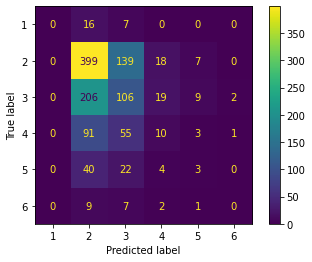

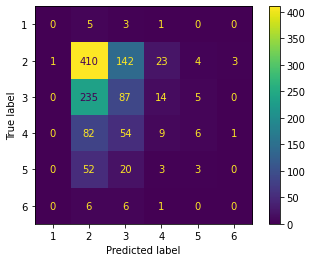

In [8]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

#### Baseline + Sentiments

Create Baseline + Sentiments Dataset

In [ ]:
data = topics.join(sentiments)

dataset = data.join(Dataset().prepare(columns=["created_at"]))
dataset.sort_values("created_at", inplace=True)
dataset = dataset.reset_index()

X = np.array(dataset.iloc[:,1:-3].values.tolist())
y = np.array(dataset['class'].values.tolist())

##### Classifiers trained with stratified cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

##### Classifiers trained with timesplit cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

#### Baseline + Sentiments + NER

Create Baseline + Sentiments + NER Dataset

In [ ]:
data = topics.join(sentiments).join(ner)

dataset = data.join(Dataset().prepare(columns=["created_at"]))
dataset.sort_values("created_at", inplace=True)
dataset = dataset.reset_index()

X = np.array(dataset.iloc[:,1:-3].values.tolist())
y = np.array(dataset['class'].values.tolist())

##### Classifiers trained with stratified cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

##### Classifiers trained with timesplit cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

#### Baseline + Sentiments + NER + Petitions on same day

Create Baseline + Sentiments + NER + Petitions on same day Dataset

In [ ]:
data = topics.join(sentiments).join(ner).join(same_day)

dataset = data.join(Dataset().prepare(columns=["created_at"]))
dataset.sort_values("created_at", inplace=True)
dataset = dataset.reset_index()

X = np.array(dataset.iloc[:,1:-3].values.tolist())
y = np.array(dataset['class'].values.tolist())

##### Classifiers trained with stratified cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

##### Classifiers trained with timesplit cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

#### Baseline + Sentiments + NER + Petitions on same day + Debate count + Google trends

Create Baseline + Sentiments + NER + Petitions on same day + Debate count Dataset

In [ ]:
data = topics.join(sentiments).join(ner).join(same_day).join(debate_count).join(trends)

dataset = data.join(Dataset().prepare(columns=["created_at"]))
dataset.sort_values("created_at", inplace=True)
dataset = dataset.reset_index()

X = np.array(dataset.iloc[:,1:-3].values.tolist())
y = np.array(dataset['class'].values.tolist())

##### Classifiers trained with stratified cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

##### Classifiers trained with timesplit cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

#### Baseline + Sentiments + NER + Petitions on same day + Debate count + Google trends + Twitter features

Create Baseline + Sentiments + NER + Petitions on same day + Debate count + Twitter features Dataset

In [ ]:
data = topics.join(sentiments).join(ner).join(same_day).join(debate_count).join(trends).join(twitter)

dataset = data.join(Dataset().prepare(columns=["created_at"]))
dataset.sort_values("created_at", inplace=True)
dataset = dataset.reset_index()

X = np.array(dataset.iloc[:,1:-3].values.tolist())
y = np.array(dataset['class'].values.tolist())

##### Classifiers trained with stratified cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

##### Classifiers trained with timesplit cross validation

KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

NB

In [ ]:
nb = ComplementNB()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

SVC

In [ ]:
svc = SVC(class_weight='balanced')
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

DT

In [ ]:
dt = DecisionTreeClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

RF

In [ ]:
rf = RandomForestClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

GB

In [ ]:
gb = XGBClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))

MLP

In [ ]:
mlp = MLPClassifier()
mcc_scores = list()
acc_scores = list()
f1_scores = list()

for train_index, test_index in tss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  mlp.fit(X_train, y_train)
  y_pred = mlp.predict(X_test)
  mcc_scores.append(round(matthews_corrcoef(y_test,y_pred),2))
  acc_scores.append(round(accuracy_score(y_test,y_pred),2))
  f1_scores.append(round(f1_score(y_test,y_pred, average='weighted'),2))
  ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)

print("MCC", round(np.mean(mcc_scores),2))
print("Accuracy", round(np.mean(acc_scores),2))
print("F1", round(np.mean(f1_scores),2))